**Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfd = pd.read_csv('/content/day.csv')
dfh = pd.read_csv('/content/hour.csv')


**day.csv**

In [3]:
print("Day CSV")
dfd.head()

Day CSV


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
columns_to_drop = [
    'instant', 'dteday', 'yr', 'casual', 'registered'
]

dfd.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [5]:
print("day.csv After Feature Removal")
dfd.head()

day.csv After Feature Removal


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [6]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


**hour.csv**

In [7]:
print("Hour CSV")
dfh.head()

Hour CSV


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
columns_to_drop = [
    'dteday',
    'casual',
    'registered',
    'yr',
    'instant'
]

dfh = dfh.drop(columns=columns_to_drop, errors='ignore')


In [10]:
print("hour.csv After Feature Removal")
dfh.head()

hour.csv After Feature Removal


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [11]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


**Checking And Deleting NULL Values**

In [12]:
print("Null values in day.csv dataset:\n", dfd.isnull().sum())


Null values in day.csv dataset:
 season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [13]:
print("Null values in hour.csv dataset:\n", dfh.isnull().sum())

Null values in hour.csv dataset:
 season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Checking & Removing Duplicates**

In [14]:
print("Duplicates in day.csv dataset:", dfd.duplicated().sum())

Duplicates in day.csv dataset: 0


In [15]:
print("Duplicates in hour.csv dataset:", dfh.duplicated().sum())

Duplicates in hour.csv dataset: 2


In [16]:
dfh = dfh.drop_duplicates()

In [17]:
print("Duplicates in hour.csv dataset:", dfh.duplicated().sum())

Duplicates in hour.csv dataset: 0


**Detect & Remove Outliers using IQR**

In [18]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [19]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


**Outlier Detection For day.csv**

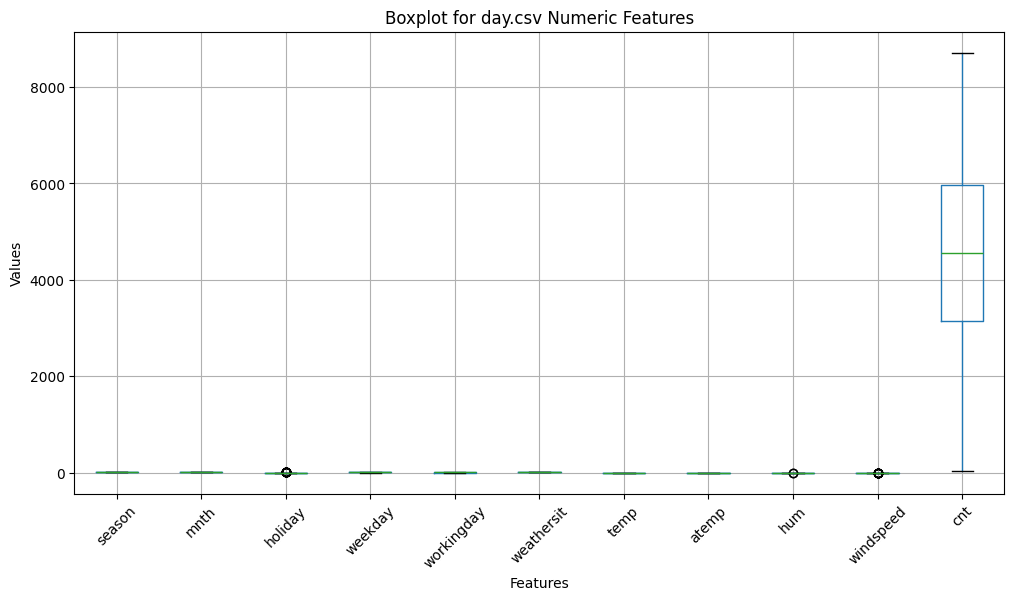

In [20]:
plt.figure(figsize=(12, 6))
dfd.boxplot()
plt.title("Boxplot for day.csv Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [21]:
dfd = remove_outliers(dfd, numeric_cols)

In [22]:
print(dfd.info())


<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      717 non-null    int64  
 1   mnth        717 non-null    int64  
 2   holiday     717 non-null    int64  
 3   weekday     717 non-null    int64  
 4   workingday  717 non-null    int64  
 5   weathersit  717 non-null    int64  
 6   temp        717 non-null    float64
 7   atemp       717 non-null    float64
 8   hum         717 non-null    float64
 9   windspeed   717 non-null    float64
 10  cnt         717 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 67.2 KB
None


**Outlier Detection For hour.csv**

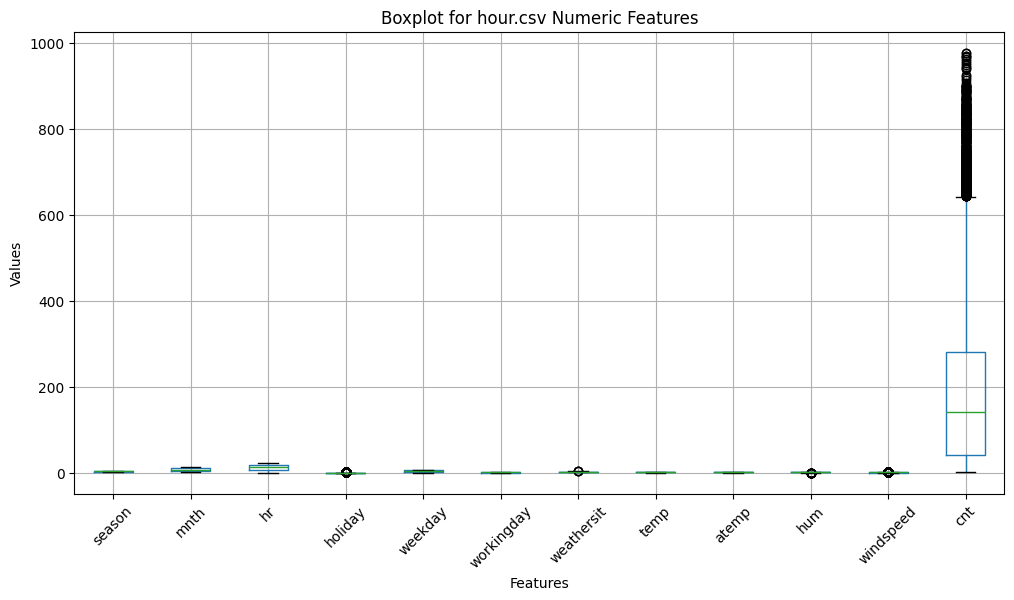

In [23]:
plt.figure(figsize=(12, 6))
dfh.boxplot()
plt.title("Boxplot for hour.csv Numeric Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [24]:
dfh = remove_outliers(dfh, numeric_cols)

In [25]:
print(dfh.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16533 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      16533 non-null  int64  
 1   mnth        16533 non-null  int64  
 2   hr          16533 non-null  int64  
 3   holiday     16533 non-null  int64  
 4   weekday     16533 non-null  int64  
 5   workingday  16533 non-null  int64  
 6   weathersit  16533 non-null  int64  
 7   temp        16533 non-null  float64
 8   atemp       16533 non-null  float64
 9   hum         16533 non-null  float64
 10  windspeed   16533 non-null  float64
 11  cnt         16533 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB
None


**Boxplots After Outlier Removal**

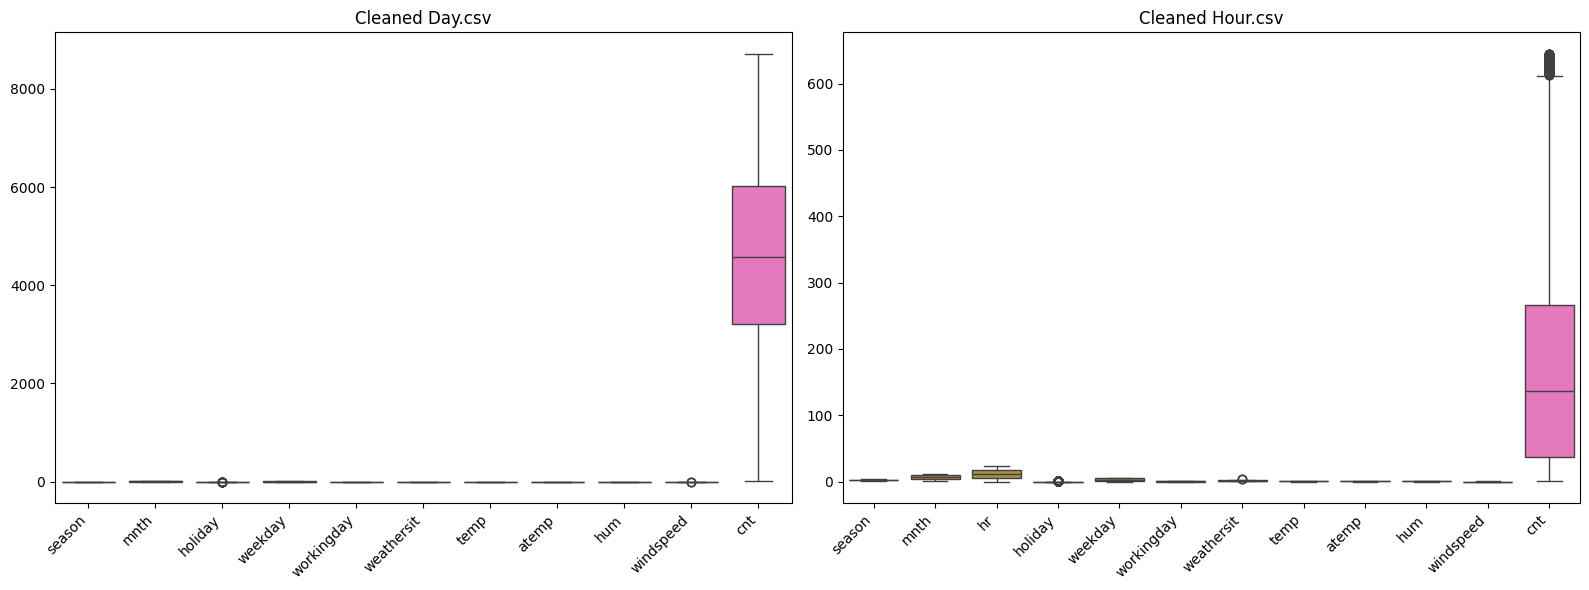

In [31]:
plt.figure(figsize=(16, 6))   # wider figure

plt.subplot(1, 2, 1)
sns.boxplot(data=dfd.select_dtypes(include='number'))
plt.title("Cleaned Day.csv")
plt.xticks(rotation=45, ha='right')   # rotate labels

plt.subplot(1, 2, 2)
sns.boxplot(data=dfh.select_dtypes(include='number'))
plt.title("Cleaned Hour.csv")
plt.xticks(rotation=45, ha='right')   # rotate labels

plt.tight_layout()
plt.show()


**HISTOGRAMS**

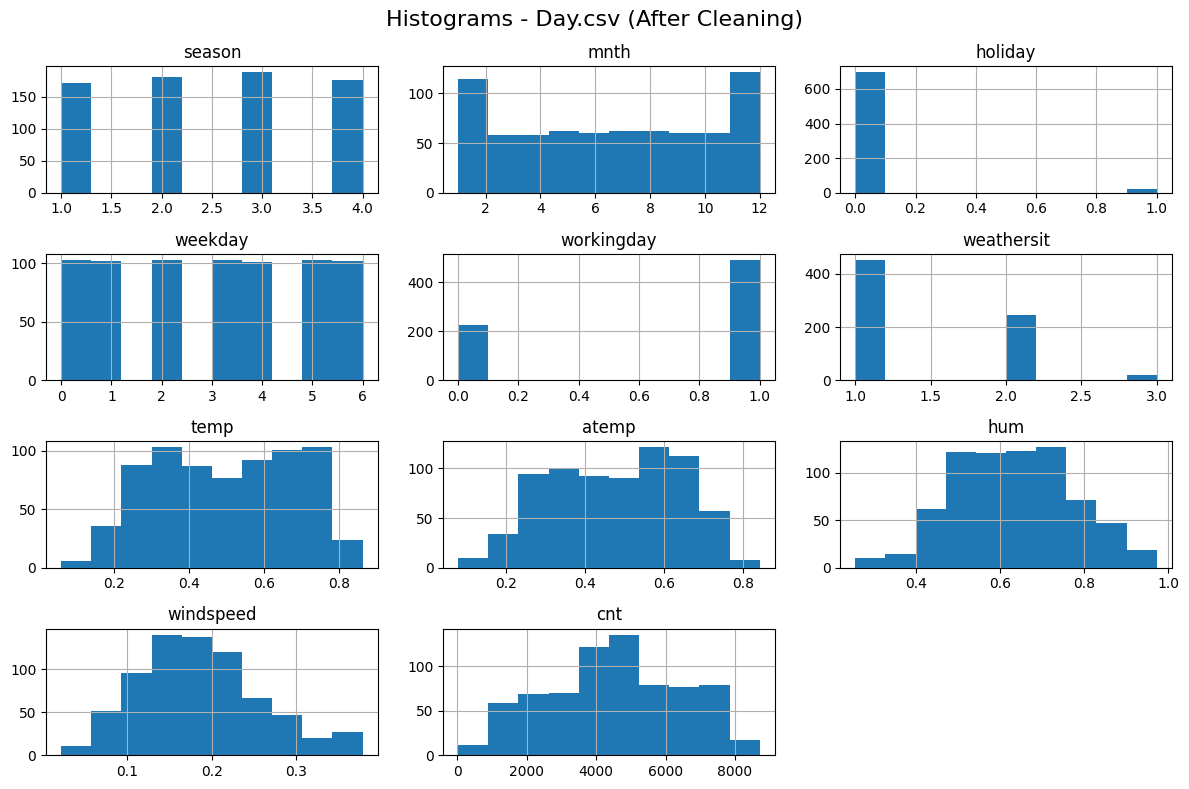

In [27]:
# --------- DAY.CSV HISTOGRAMS ---------
dfd.select_dtypes(include='number').hist(figsize=(12, 8))
plt.suptitle("Histograms - Day.csv (After Cleaning)", fontsize=16)
plt.tight_layout()
plt.show()


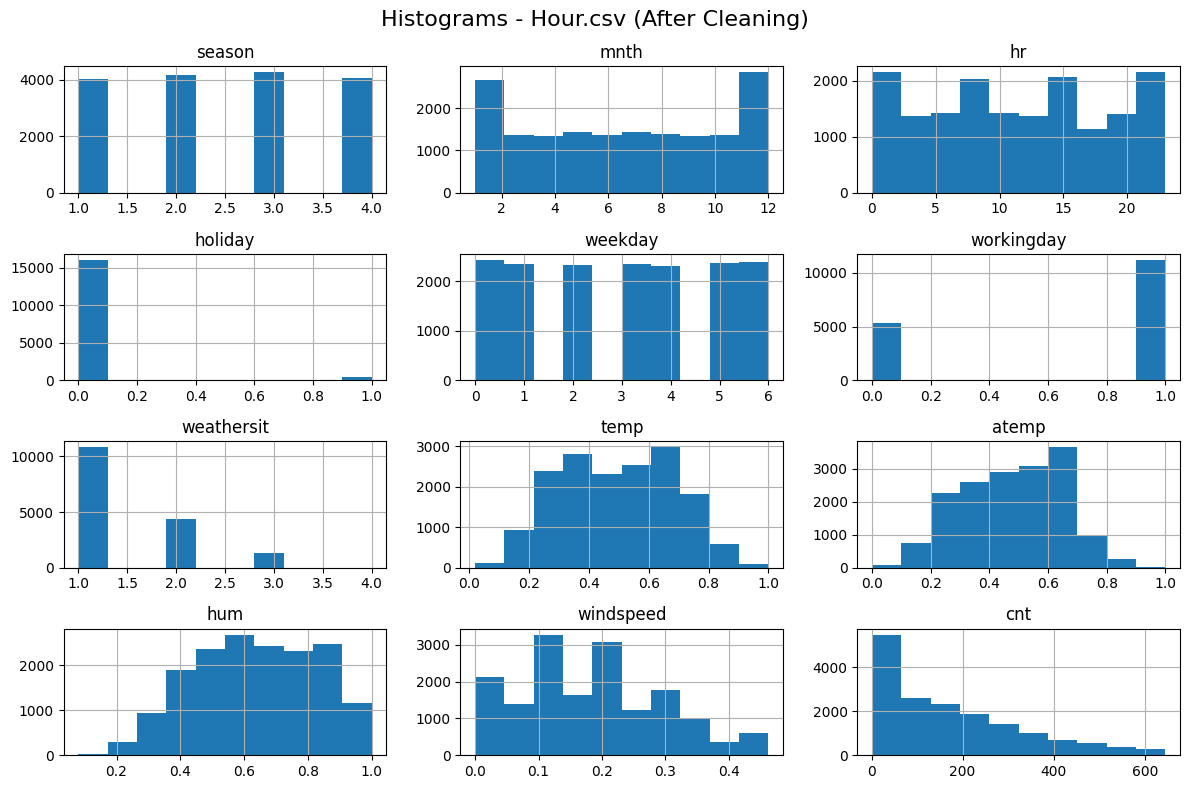

In [28]:
# --------- HOUR.CSV HISTOGRAMS ---------
dfh.select_dtypes(include='number').hist(figsize=(12, 8))
plt.suptitle("Histograms - Hour.csv (After Cleaning)", fontsize=16)
plt.tight_layout()
plt.show()

**Pairplot**

<Figure size 640x480 with 0 Axes>

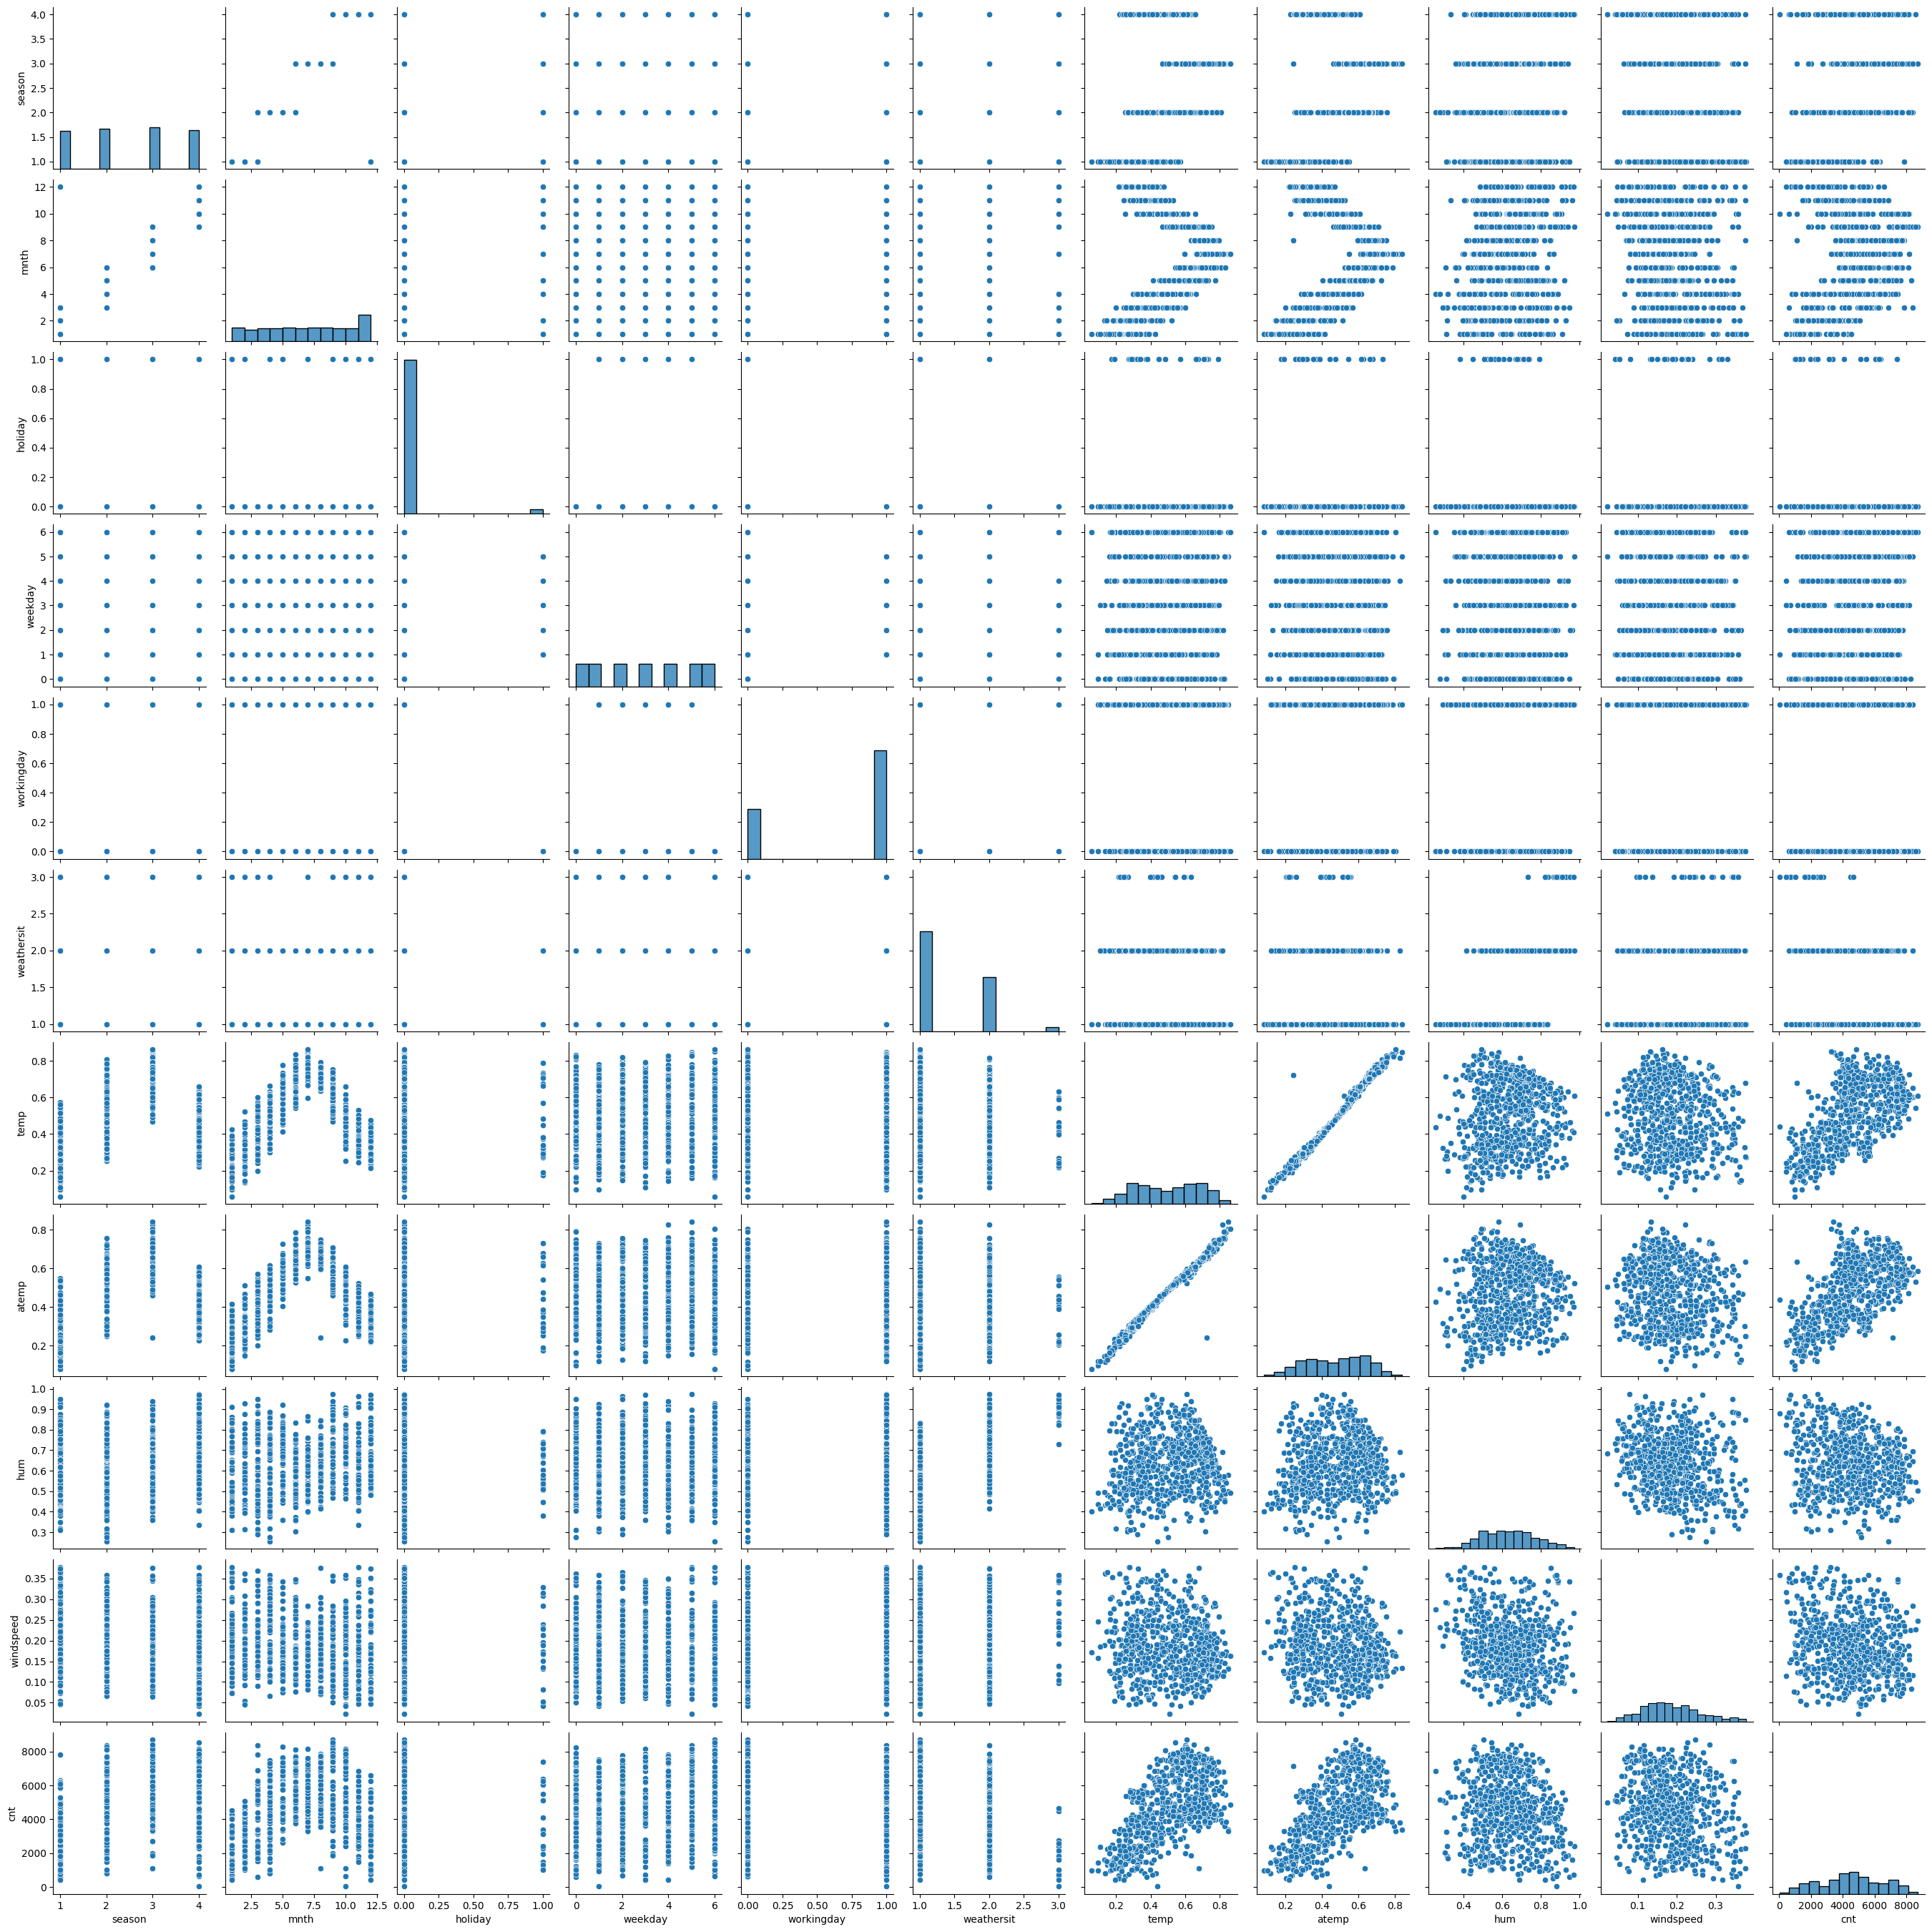

In [29]:
plt.suptitle("Pairplot- Day.csv (After Cleaning)", fontsize=16)
sns.pairplot(dfd.select_dtypes(include='number'))
plt.show()

<Figure size 640x480 with 0 Axes>

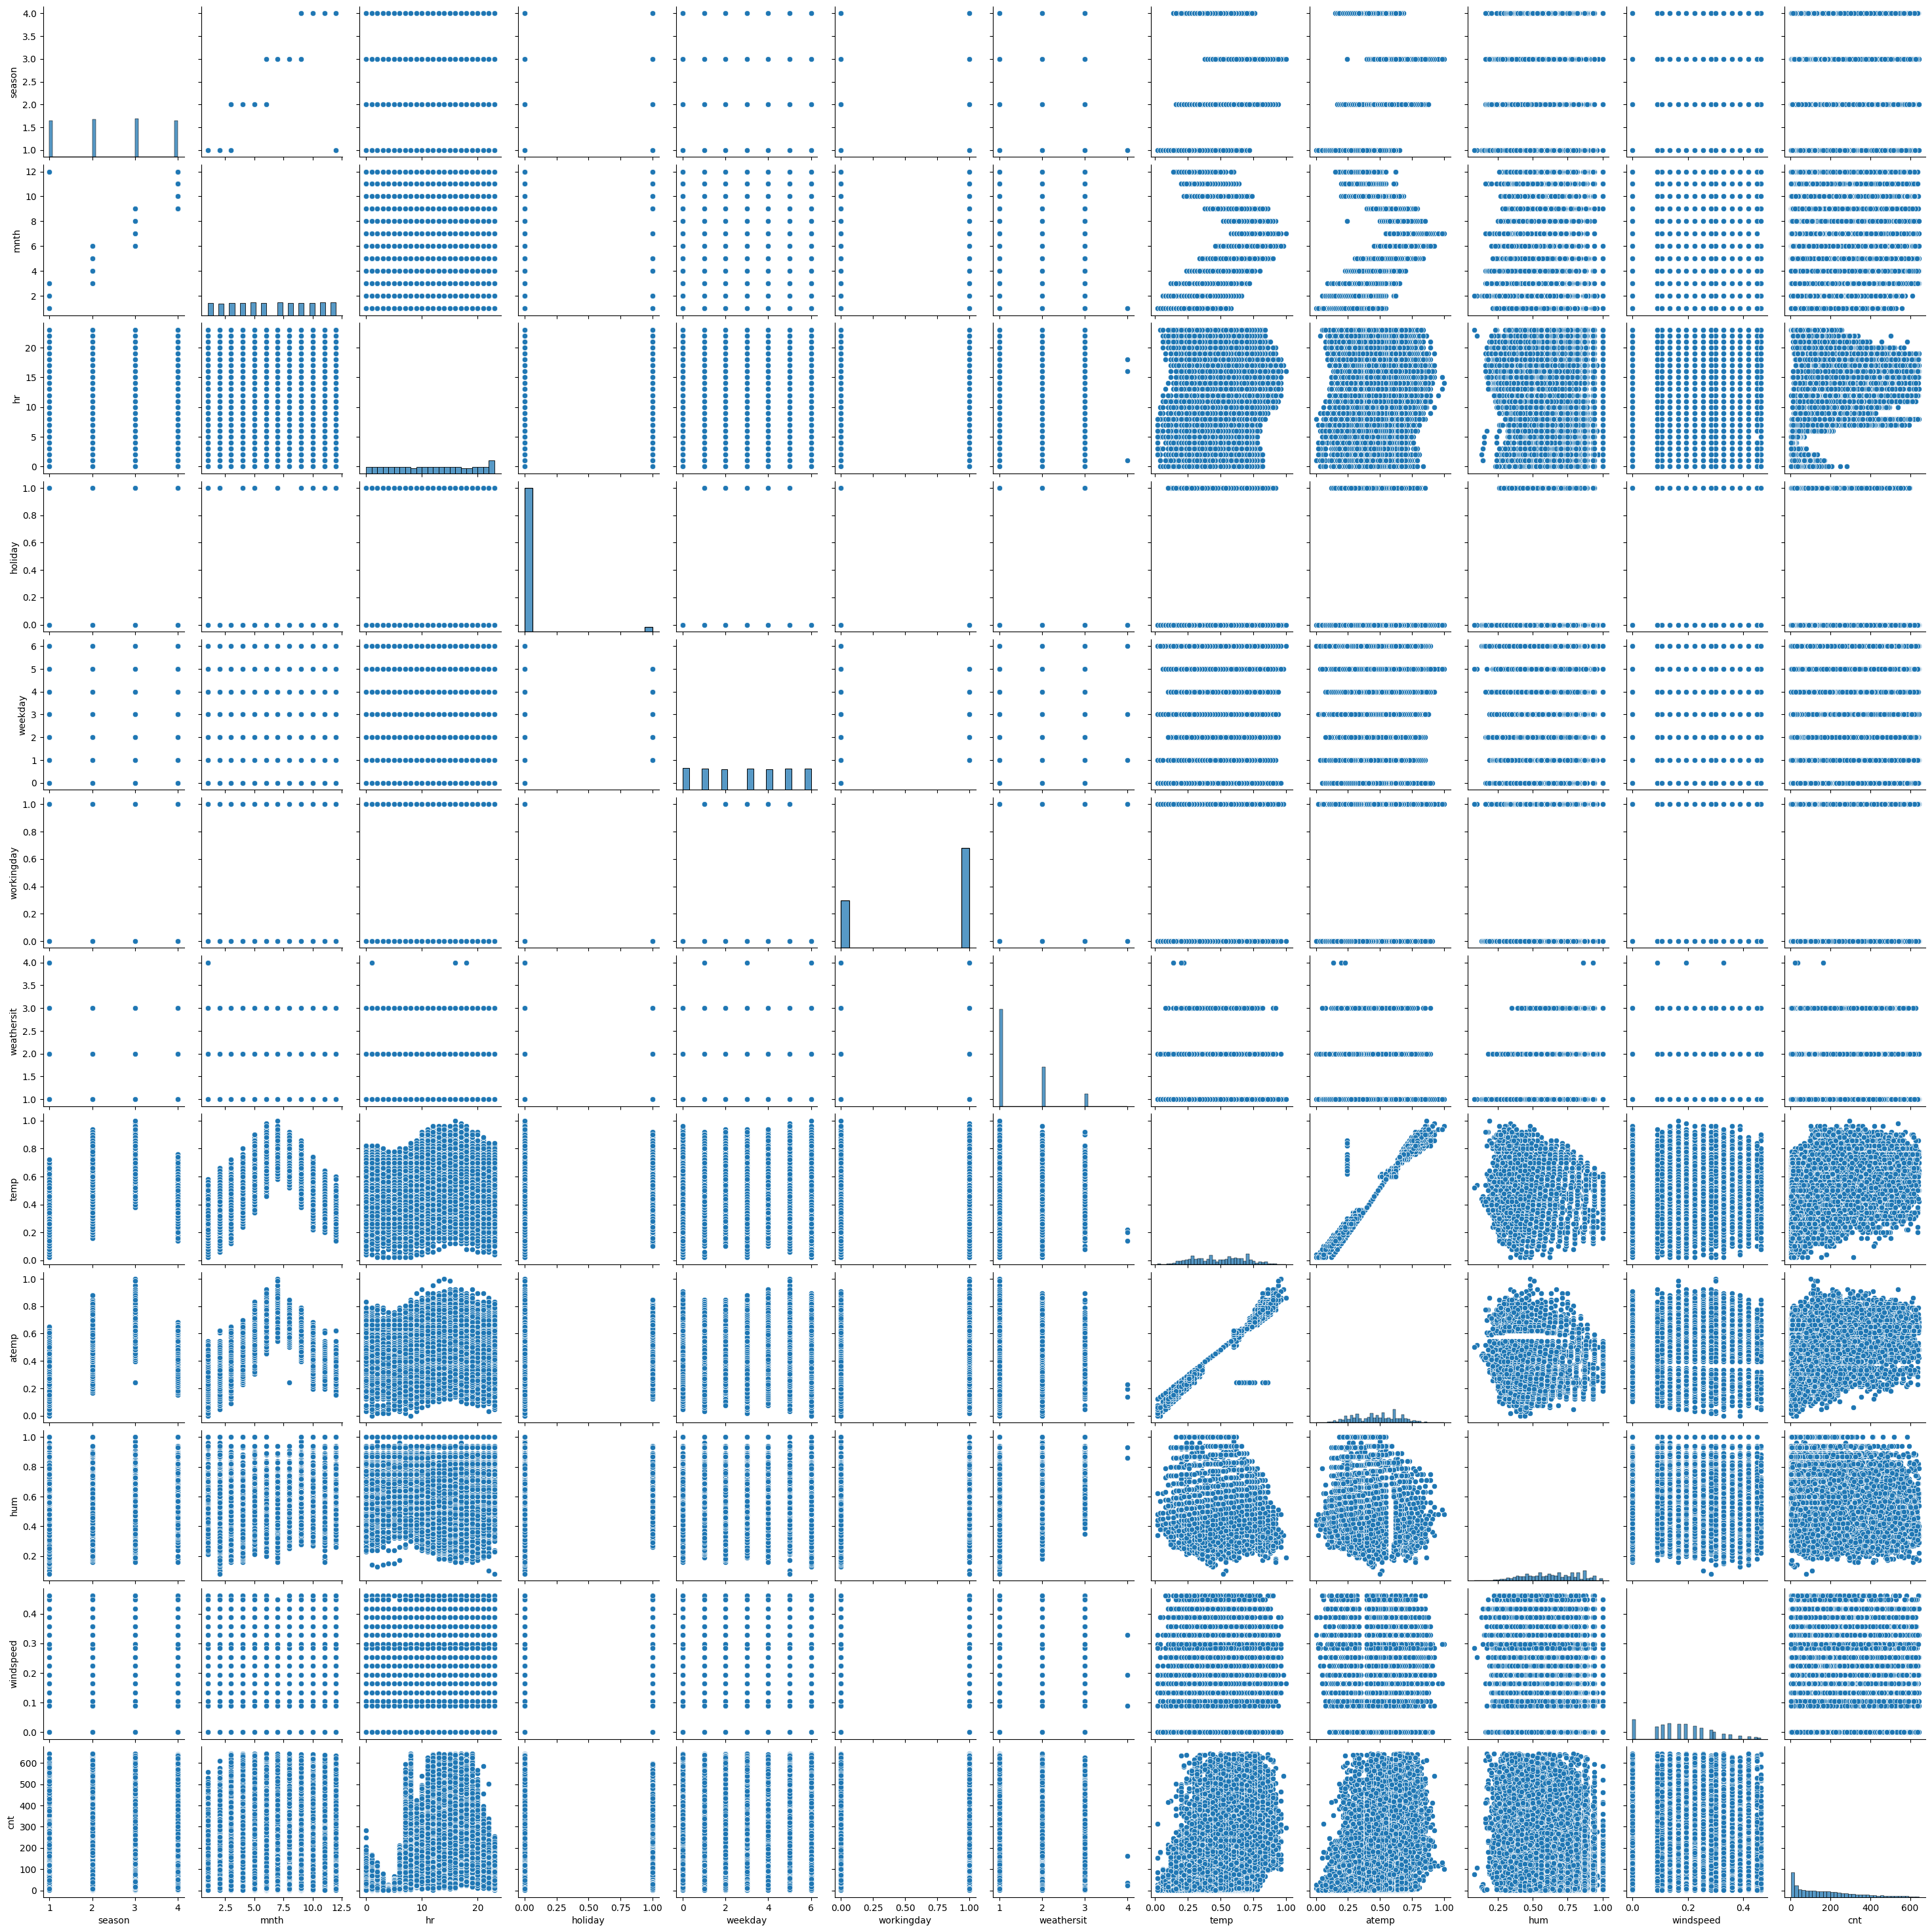

In [30]:
plt.suptitle("Histograms - Hour.csv (After Cleaning)", fontsize=16)
sns.pairplot(dfh.select_dtypes(include='number'))
plt.show()